In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

from utils import *

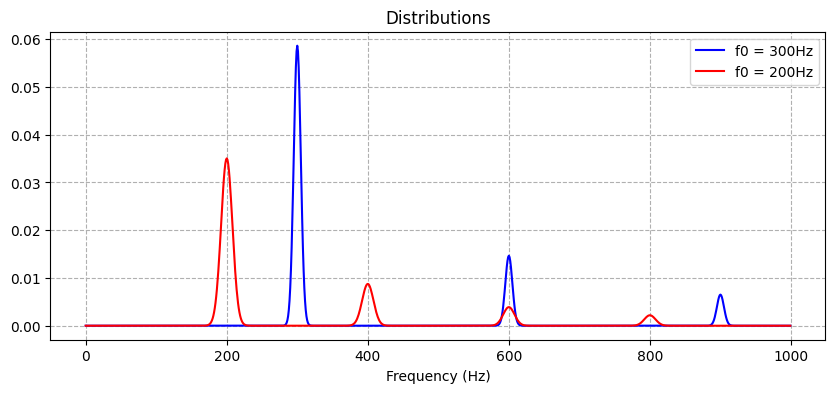

In [2]:
# Define gaussian distributions

gaussian_size = 1000

gaussian_f1 = gaussian_size * 0.3
gaussian_f2 = gaussian_size * 0.2
gaussian_s1 = gaussian_size * 0.005
gaussian_s2 = gaussian_size * 0.008

# Gaussian distributions
gaussian_1 = natural_gaussian(gaussian_f1, gaussian_s1, gaussian_size)
gaussian_2 = natural_gaussian(gaussian_f2, gaussian_s2, gaussian_size)

frequency = np.arange(gaussian_size, dtype=np.float64)

plt.figure(figsize=[10, 4])

# Use line plots for a cleaner look
plt.plot(frequency, gaussian_1, label=f"f0 = {gaussian_f1:.0f}Hz", color='blue', linewidth=1.5)
plt.plot(frequency, gaussian_2, label=f"f0 = {gaussian_f2:.0f}Hz", color='red', linewidth=1.5)

plt.xlabel('Frequency (Hz)')
plt.title('Distributions')
plt.grid(True, which="both", ls="--")
plt.legend()

plt.show()

## Optimal transport

In [3]:
# Optimal transport

alpha = 0.5

# Quantile method 

gaussian_quantile_interpolation = quantile_optimal_transport(gaussian_1, gaussian_2, alpha=alpha)

# EMD 

gaussian_emd_interpolation = emd_optimal_transport(frequency, gaussian_1, gaussian_2, alpha=alpha)

# ot.bregman.sinkhorn_stabilized

reg = 1e-3
gaussian_ss_interpolation = sinkhorn_stabilized_optimal_transport(gaussian_1, gaussian_2, alpha=alpha, reg=reg)


/Users/davidvaldivia/IASD/memoire/audio_ot/audio_1D_transport/.venv/lib/python3.9/site-packages/ot/backend.py:1143: RuntimeWarning: divide by zero encountered in log
  return np.log(a)
/Users/davidvaldivia/IASD/memoire/audio_ot/audio_1D_transport/.venv/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:1095: RuntimeWarning: invalid value encountered in divide
  u = a / (nx.dot(K, v))
/Users/davidvaldivia/IASD/memoire/audio_ot/audio_1D_transport/.venv/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:1139: UserWarning: Numerical errors at iteration 6
  warnings.warn('Numerical errors at iteration %d' % ii)


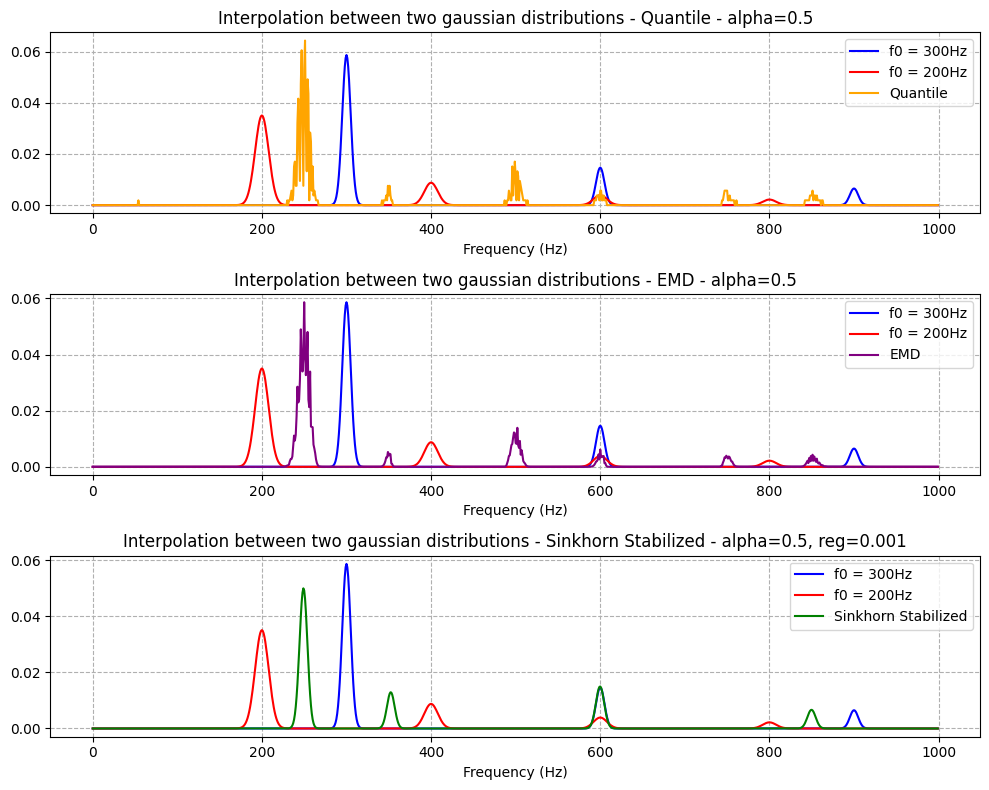

In [4]:
plt.figure(figsize=[10, 8])  # Increase figure size to accommodate both subplots

# First subplot for A, C, and quantile interpolation
plt.subplot(3, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(frequency, gaussian_1, label=f"f0 = {gaussian_f1:.0f}Hz", color='blue', linewidth=1.5)
plt.plot(frequency, gaussian_2, label=f"f0 = {gaussian_f2:.0f}Hz", color='red', linewidth=1.5)
plt.plot(frequency, gaussian_quantile_interpolation, label='Quantile', color="orange")
plt.xlabel('Frequency (Hz)')
plt.title(f'Interpolation between two gaussian distributions - Quantile - alpha={alpha}')
plt.grid(True, which="both", ls="--")
plt.legend()

# Second subplot for A, C, and EMD interpolation
plt.subplot(3, 1, 2)  # 2 rows, 1 column, second plot
plt.plot(frequency, gaussian_1, label=f"f0 = {gaussian_f1:.0f}Hz", color='blue', linewidth=1.5)
plt.plot(frequency, gaussian_2, label=f"f0 = {gaussian_f2:.0f}Hz", color='red', linewidth=1.5)
plt.plot(frequency, gaussian_emd_interpolation, label='EMD', color="purple")
plt.xlabel('Frequency (Hz)')
plt.title(f'Interpolation between two gaussian distributions - EMD - alpha={alpha}')
plt.grid(True, which="both", ls="--")
plt.legend()

# Third subplot for A, C, and Sinkhorn Stabilized interpolation
plt.subplot(3, 1, 3)  # 2 rows, 1 column, second plot
plt.plot(frequency, gaussian_1, label=f"f0 = {gaussian_f1:.0f}Hz", color='blue', linewidth=1.5)
plt.plot(frequency, gaussian_2, label=f"f0 = {gaussian_f2:.0f}Hz", color='red', linewidth=1.5)
plt.plot(frequency, gaussian_ss_interpolation, label='Sinkhorn Stabilized', color="green")
plt.xlabel('Frequency (Hz)')
plt.title(f'Interpolation between two gaussian distributions - Sinkhorn Stabilized - alpha={alpha}, reg={reg}')
plt.grid(True, which="both", ls="--")
plt.legend()

plt.tight_layout()  # Adjust the layout so the plots are neatly arranged
plt.show()

## Animations

MovieWriter ffmpeg unavailable; using Pillow instead.


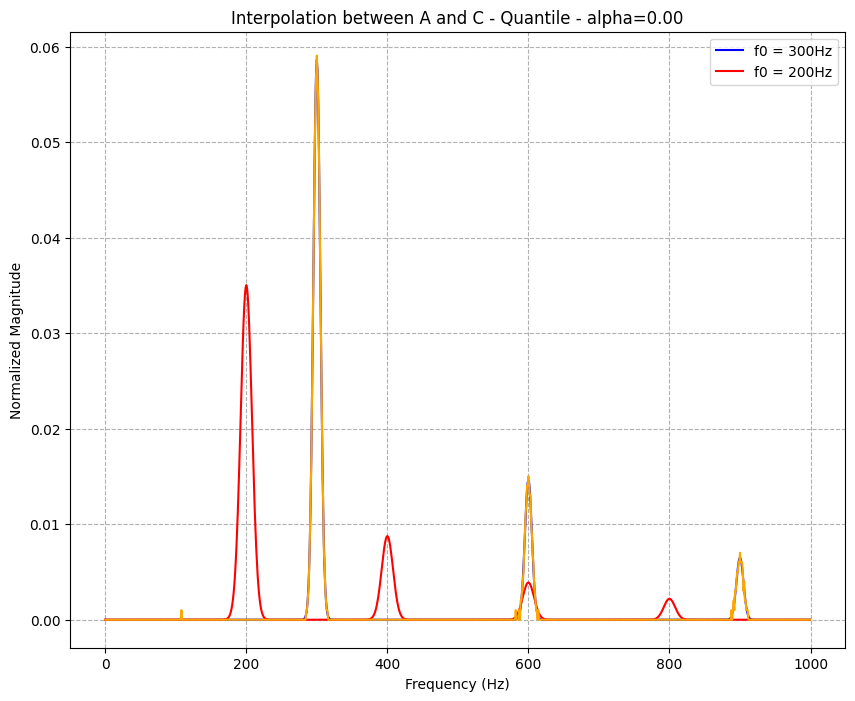

In [5]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=[10, 8])

ax.plot(frequency, gaussian_1, label=f"f0 = {gaussian_f1:.0f}Hz", color='blue', linewidth=1.5)
ax.plot(frequency, gaussian_2, label=f"f0 = {gaussian_f2:.0f}Hz", color='red', linewidth=1.5)
ax.set(xlabel='Frequency (Hz)', ylabel='Normalized Magnitude', title='Interpolation between two gaussian distributions - Quantile - alpha={alpha}')
ax.grid(True, which="both", ls="--")
ax.legend()

# Placeholder for the quantile interpolation plot, initially not visible
quantile_line, = ax.plot([], [], label='Quantile', color="orange")

def update(frame):
    # Calculate new alpha for this frame
    alpha = frame / 40.0  # Assuming 40 frames to go from 0 to 1
    
    # Recalculate quantile interpolation with the new alpha
    gaussian_quantile_interpolation = quantile_optimal_transport(gaussian_1, gaussian_2, alpha=alpha)
    
    # Update the data for the quantile interpolation plot
    quantile_line.set_data(frequency, gaussian_quantile_interpolation)
    
    # Update the title to reflect the current alpha
    ax.set_title(f'Interpolation between A and C - Quantile - alpha={alpha:.2f}')
    
    return quantile_line,

# Create animation
ani = animation.FuncAnimation(fig=fig, func=update, frames=np.arange(0, 41), interval=100)

# Save the animation
ani.save('animations/gaussians/quantile_interpolation.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


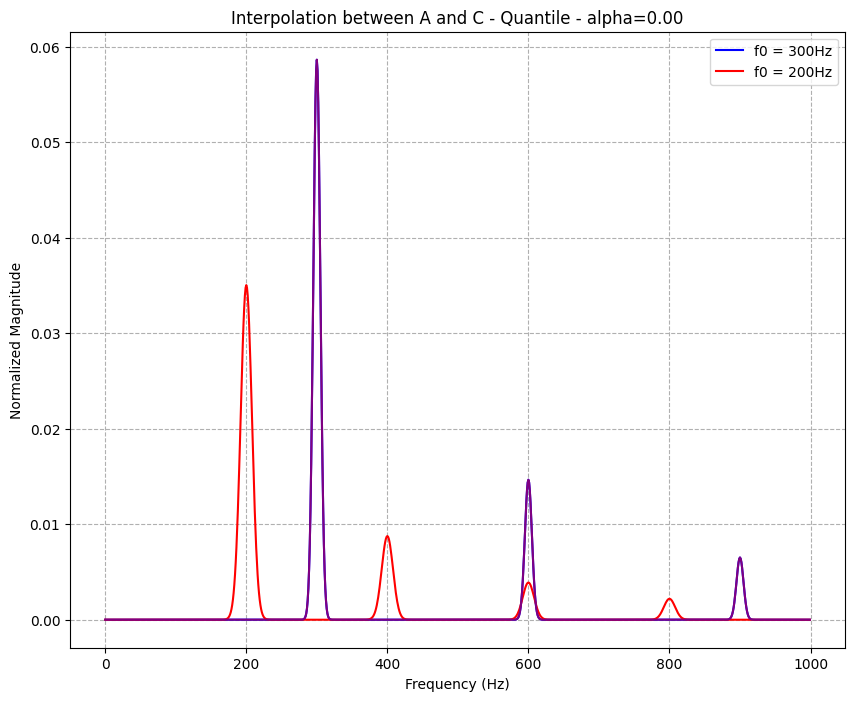

In [7]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=[10, 8])

ax.plot(frequency, gaussian_1, label=f"f0 = {gaussian_f1:.0f}Hz", color='blue', linewidth=1.5)
ax.plot(frequency, gaussian_2, label=f"f0 = {gaussian_f2:.0f}Hz", color='red', linewidth=1.5)
ax.set(xlabel='Frequency (Hz)', ylabel='Normalized Magnitude', title='Interpolation between two gaussian distributions - EMD - alpha={alpha}')
ax.grid(True, which="both", ls="--")
ax.legend()

emd_line, = ax.plot([], [], label='Quantile', color="purple")

def update(frame):
    alpha = frame / 40.0  # Assuming 40 frames to go from 0 to 1
    
    gaussian_emd_interpolation = emd_optimal_transport(frequency, gaussian_1, gaussian_2, alpha=alpha)
    
    emd_line.set_data(frequency, gaussian_emd_interpolation)
    
    ax.set_title(f'Interpolation between A and C - Quantile - alpha={alpha:.2f}')
    
    return emd_line,

# Create animation
ani = animation.FuncAnimation(fig=fig, func=update, frames=np.arange(0, 41), interval=100)

# Save the animation
ani.save('animations/gaussians/emd_interpolation.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


/Users/davidvaldivia/IASD/memoire/audio_ot/audio_1D_transport/.venv/lib/python3.9/site-packages/ot/backend.py:1143: RuntimeWarning: divide by zero encountered in log
  return np.log(a)
/Users/davidvaldivia/IASD/memoire/audio_ot/audio_1D_transport/.venv/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:1095: RuntimeWarning: invalid value encountered in divide
  u = a / (nx.dot(K, v))
/Users/davidvaldivia/IASD/memoire/audio_ot/audio_1D_transport/.venv/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:1139: UserWarning: Numerical errors at iteration 6
  warnings.warn('Numerical errors at iteration %d' % ii)


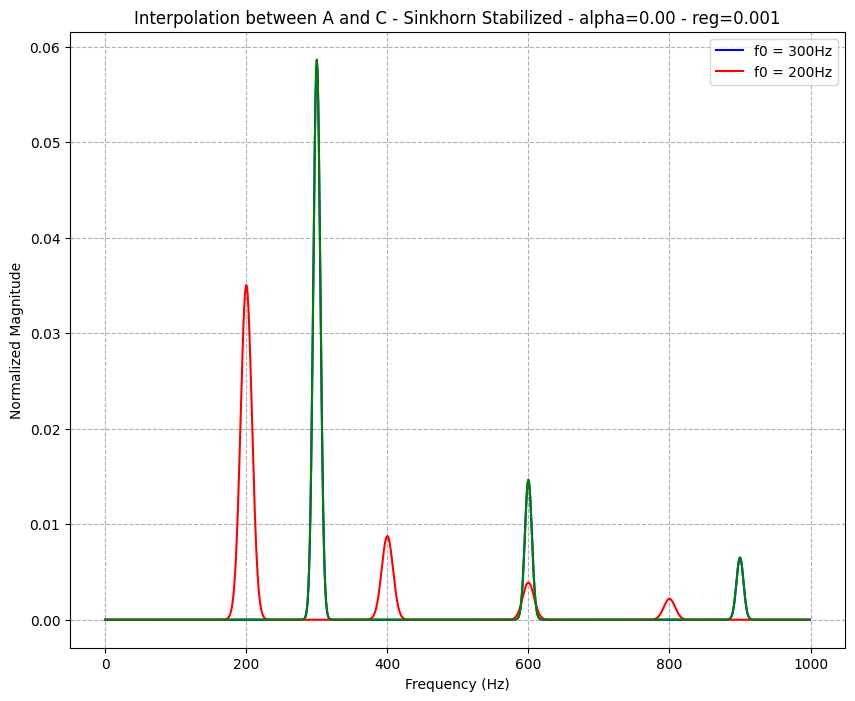

In [ ]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=[10, 8])

ax.plot(frequency, gaussian_1, label=f"f0 = {gaussian_f1:.0f}Hz", color='blue', linewidth=1.5)
ax.plot(frequency, gaussian_2, label=f"f0 = {gaussian_f2:.0f}Hz", color='red', linewidth=1.5)
ax.set(xlabel='Frequency (Hz)', ylabel='Normalized Magnitude', title='Interpolation between two gaussian distributions - Sinkhorn Stabilized - alpha={alpha}, reg={reg}')
ax.grid(True, which="both", ls="--")
ax.legend()

ss_line, = ax.plot([], [], label='Quantile', color="green")

def update(frame):
    alpha = frame / 40.0  # Assuming 40 frames to go from 0 to 1
    
    gaussian_ss_interpolation = sinkhorn_stabilized_optimal_transport(gaussian_1, gaussian_2, alpha=alpha, reg=reg)
    
    ss_line.set_data(frequency, gaussian_ss_interpolation)
    
    ax.set_title(f'Interpolation between A and C - Sinkhorn Stabilized - alpha={alpha:.2f} - reg={reg}')
    
    return ss_line,

# Create animation
ani = animation.FuncAnimation(fig=fig, func=update, frames=np.arange(0, 41), interval=100)

# Save the animation
ani.save(f'animations/gaussians/ss_interpolation-reg={reg}.gif')